In [11]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
# !mamba install openpyxl==3.0.9 -qy

In [12]:
df = pd.read_csv("FuelConsumptionCo2.csv")
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [13]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [14]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


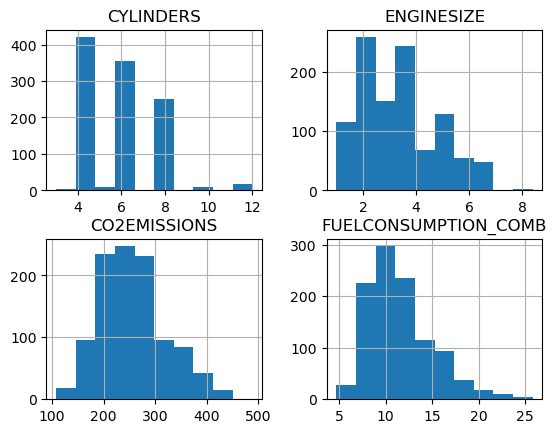

In [15]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

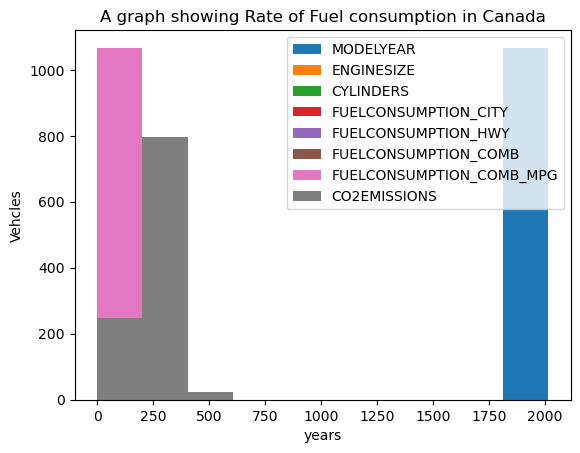

In [16]:
# df.plot(kind='area')
df.plot(kind='hist')
plt.title("A graph showing Rate of Fuel consumption in Canada")
plt.ylabel("Vehcles")
plt.xlabel("years")
plt.show()

In [17]:
#summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [18]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


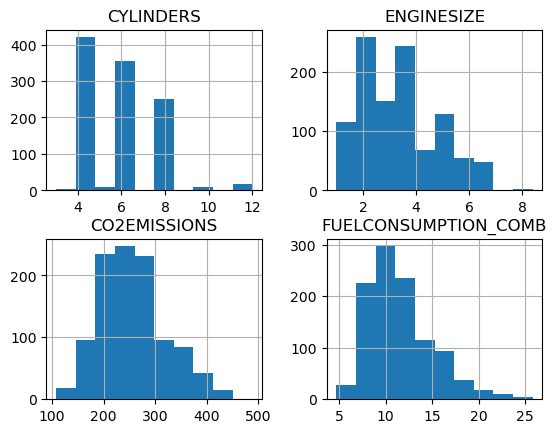

In [19]:
#plotting each of the above features
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

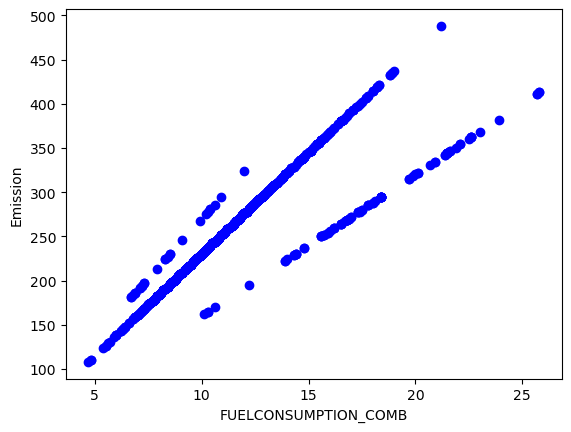

In [20]:
# Now, let's plot each of these features against the Emission, to see how linear their relationship is:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

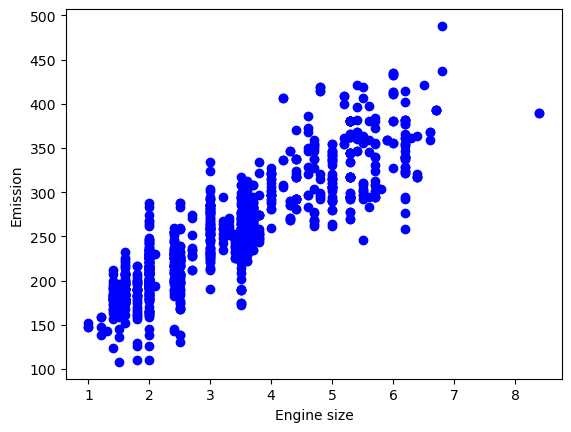

In [21]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

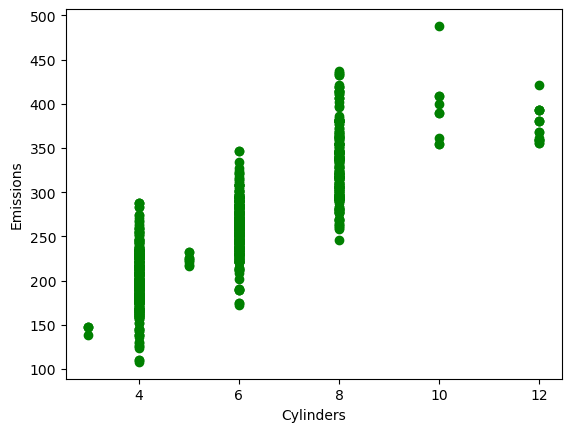

In [22]:
plt.scatter(cdf.CYLINDERS ,cdf.CO2EMISSIONS, color='green');
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()

In [23]:
# Creating train and test dataset
# Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive.
# After which, you train with the training set and test with the testing set. This will provide a more accurate 
# evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used 
# to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

# This means that we know the outcome of each data point in the testing dataset, making it great to test with! 
# Since this data has not been used to train the model, the model has no knowledge of the outcome of these data 
# points. So, in essence, it is truly an out-of-sample testing.

# Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for
# testing. We create a mask to select random rows using np.random.rand() function:
# Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training
# and 20% for testing. We create a mask to select random rows using np.random.rand() function:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
# train
test = cdf[~msk]
# test

In [24]:
# Simple Regression Model¶
# Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares'
# between the actual value y in the dataset, and the predicted value yhat using linear approximation.
# Train data distribution

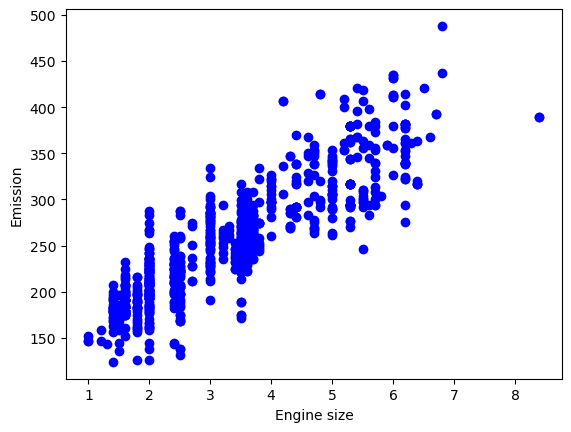

In [25]:
#Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [26]:
#Using sklearn package to model data.
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.99399351]]
Intercept:  [126.07279802]


Text(0, 0.5, 'Emission')

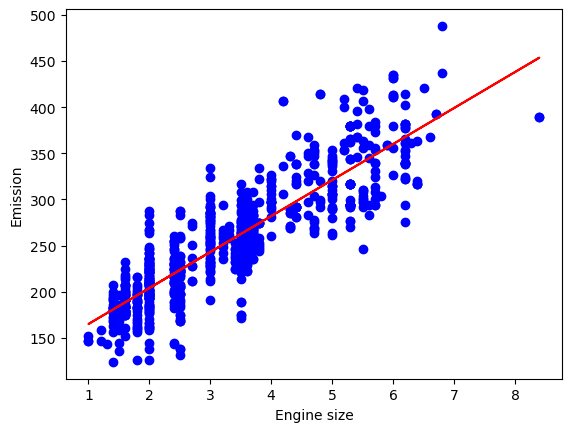

In [27]:
# As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit
# line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are 
# the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the 
# data must be available to traverse and calculate the parameters.

#plotting a fit line over the data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [28]:
#checking the Evalluation Metrics of the Regression model
# Evaluation¶
# We compare the actual values and predicted values to calculate the accuracy of a regression model. 
# Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require 
# improvement.

# There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on 
# the test set:

# Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to 
#     understand since it’s just average error.

# Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean
#     Absolute Error because the focus is geared more towards large errors. This is due to the squared term 
#     exponentially increasing larger errors in comparison to smaller ones.

# Root Mean Squared Error (RMSE).

# R-squared is not an error, but rather a popular metric to measure the performance of your regression model. 
# It represents how close the data points are to the fitted regression line. The higher the R-squared value, the 
# better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be
#  arbitrarily worse).

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.01
Residual sum of squares (MSE): 966.97
R2-score: 0.76


In [30]:
# Lets get into Multiple Linear Regression
df2 = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
df2.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [31]:
cdf2 = df2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf2.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


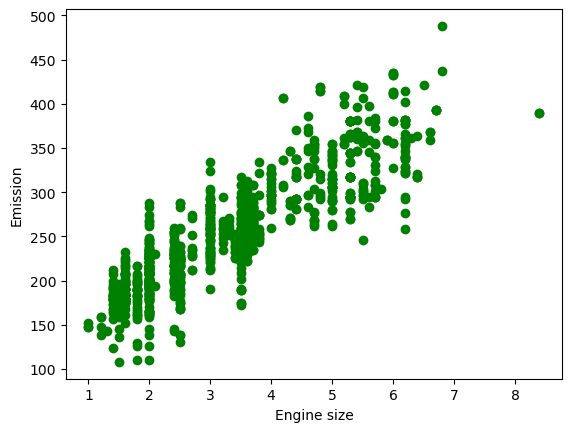

In [33]:
# Let's plot Emission values with respect to Engine size:
plt.scatter(cdf2.ENGINESIZE, cdf2.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

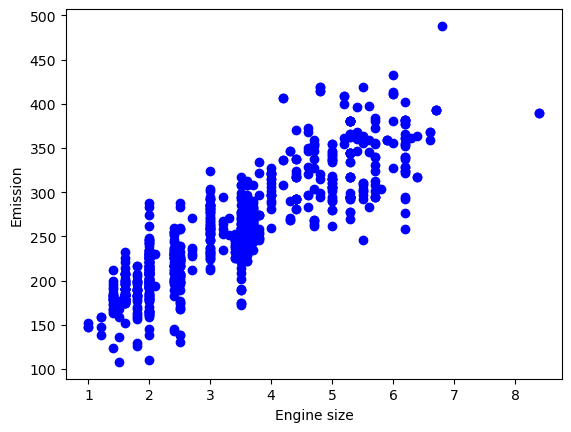

In [35]:
# Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training 
# and 20% for testing. We create a mask to select random rows using the np.random.rand() function:
msk2 = np.random.rand(len(df)) < 0.8
train2 = cdf2[msk2]
test2 = cdf2[~msk2]

plt.scatter(train2.ENGINESIZE, train2.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [37]:
# Multiple Regression Model
# In reality, there are multiple variables that impact the co2emission.
# When more than one independent variable is present, the process is called multiple linear regression. 
# An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, 
# EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension 
# of the simple linear regression model.

from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train2[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[9.3834161  8.64587392 9.50587364]]


In [38]:
# As mentioned before, Coefficient and Intercept are the parameters of the fitted line. Given that it is a multiple 
# linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the 
# hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to
# solve this problem.

# Ordinary Least Squares (OLS)
# OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters
# of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences 
# between the target dependent variable and those predicted by the linear function. In other words, it tries to 
# minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our 
# predicted output ( 𝑦̂  ) over all samples in the dataset.

# OLS can find the best parameters using of the following methods:

# Solving the model parameters analytically using closed-form equations
# Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

y_hat = regr.predict(test2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test2[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 536.18
Variance score: 0.88


/home/lawrence/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [39]:
# **Explained variance regression score:**
# Let  𝑦̂   be the estimated target output, y the corresponding (correct) target output, and Var be the Variance 
# (the square of the standard deviation). Then the explained variance is estimated as follows:

# 𝚎𝚡𝚙𝚕𝚊𝚒𝚗𝚎𝚍𝚅𝚊𝚛𝚒𝚊𝚗𝚌𝚎(𝑦,𝑦̂ )=1−𝑉𝑎𝑟𝑦−𝑦̂ 𝑉𝑎𝑟𝑦 
# The best possible score is 1.0, the lower values are worse.

# Practice¶
# Try to use a multiple linear regression with the same dataset, but this time use FUELCONSUMPTION_CITY 
# and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?

regr = linear_model.LinearRegression()
x = np.asanyarray(train2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train2[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test2[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[9.43534183 8.37941342 5.95536948 3.30831166]]
Residual sum of squares: 535.23
Variance score: 0.88


/home/lawrence/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [40]:
# Lets dive right in polynomial regression
# Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression 
# methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such 
# as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

# In essence, we can call all of these, polynomial regression, where the relationship between the independent 
# variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a 
# polynomial regression (let's make 2 degree polynomial):

# 𝑦=𝑏+𝜃_1𝑥+𝜃_2𝑥2
 
# Now, the question is: how we can fit our data on this equation while we have only x values, such as Engine Size?
#                        Well, we can create a few additional features: 1,  𝑥 , and  𝑥2 .

# PolynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. 
# That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less
# than or equal to the specified degree. For example, lets say the original feature set has only one feature, 
# ENGINESIZE. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, 
# degree=0, degree=1 and degree=2:

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train2[['ENGINESIZE']])
train_y = np.asanyarray(train2[['CO2EMISSIONS']])

test_x = np.asanyarray(test2[['ENGINESIZE']])
test_y = np.asanyarray(test2[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [41]:
# fit_transform takes our x values, and output a list of our data raised from power of 0 to power of 2 
# (since we set the degree of our polynomial to 2).

# It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. Indeed, Polynomial
# regression is a special case of linear regression, with the main idea of how do you select your features. 
# Just consider replacing the  𝑥  with  𝑥_1 ,  𝑥_12  with  𝑥_2 , and so on. Then the 2nd degree equation would be 
# turn into:

# 𝑦=𝑏+𝜃_1𝑥_1+𝜃_2𝑥_2
 
# Now, we can deal with it as a 'linear regression' problem. Therefore, this polynomial regression is considered to 
# be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear 
# regression to solve such problems.

# so we can use LinearRegression() function to solve it:
from sklearn import linear_model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         52.70734087 -1.878254  ]]
Intercept:  [104.17343783]


Text(0, 0.5, 'Emission')

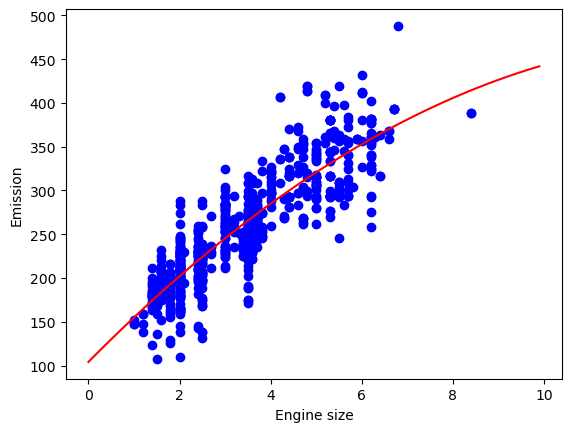

In [42]:
# As mentioned before, Coefficient and Intercept , are the parameters of the fit curvy line. 
# Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are 
# the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature  sets. 
# Lets plot it:
plt.scatter(train2.ENGINESIZE, train2.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [43]:
# Evaluation
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 24.41
Residual sum of squares (MSE): 976.42
R2-score: 0.78


Coefficients:  [[ 0.         32.87858535  3.54718251 -0.44660465]]
Intercept:  [125.35412775]
Mean absolute error: 24.35
Residual sum of squares (MSE): 970.79
R2-score: 0.78


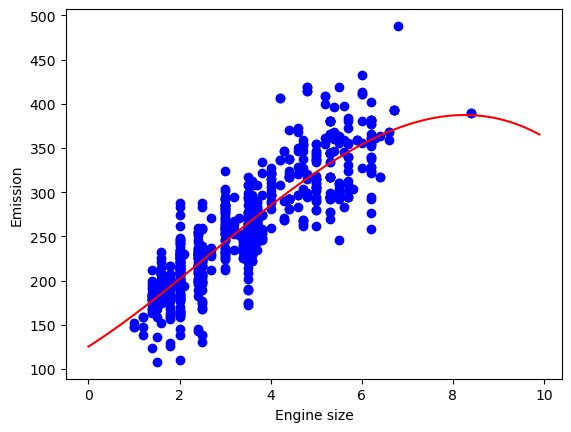

In [44]:
# Try to use a polynomial regression with the dataset but this time with degree three (cubic).
# Does it result in better accuracy?
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)

plt.scatter(train2.ENGINESIZE, train2.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3_ ) )

In [45]:
#  lets dive right in Non linear regression
# If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to 
# a non-linear regression since linear regression presumes that the data is linear. Let's learn about non linear 
# regressions and apply an example in python. In this notebook, we fit a non-linear model to the datapoints 
# corrensponding to China's GDP from 1960 to 2014.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

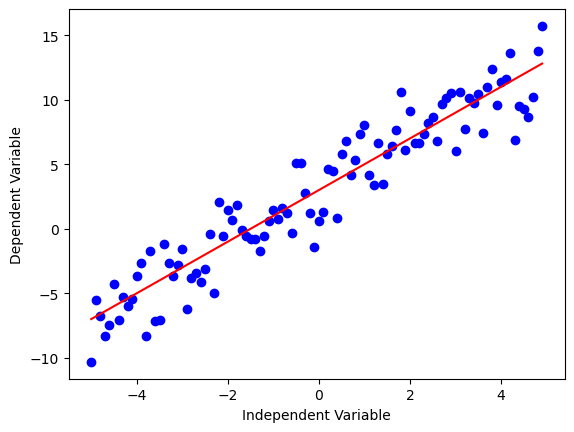

In [46]:
# Although linear regression can do a great job at modeling some datasets, it cannot be used for all datasets. 
# First recall how linear regression, models a dataset. It models the linear relationship between a dependent 
# variable y and the independent variables x. It has a simple equation, of degree 1, for example y =  2𝑥  + 3.

x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

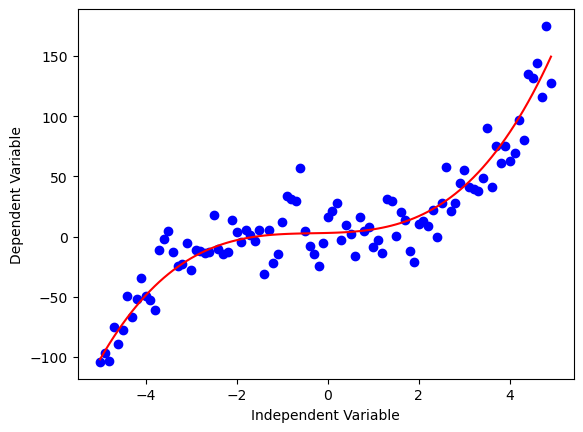

In [47]:
# Non-linear regression is a method to model the non-linear relationship between the independent variables  𝑥  and 
# the dependent variable  𝑦 . Essentially any relationship that is not linear can be termed as non-linear, and is
# usually represented by the polynomial of  𝑘  degrees (maximum power of  𝑥 ). For example:

#  𝑦=𝑎𝑥3+𝑏𝑥2+𝑐𝑥+𝑑 
 
# Non-linear functions can have elements like exponentials, logarithms, fractions, and so on. For example:
# 𝑦=log(𝑥)
 
# We can have a function that's even more complicated such as :
# 𝑦=log(𝑎𝑥3+𝑏𝑥2+𝑐𝑥+𝑑)

x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

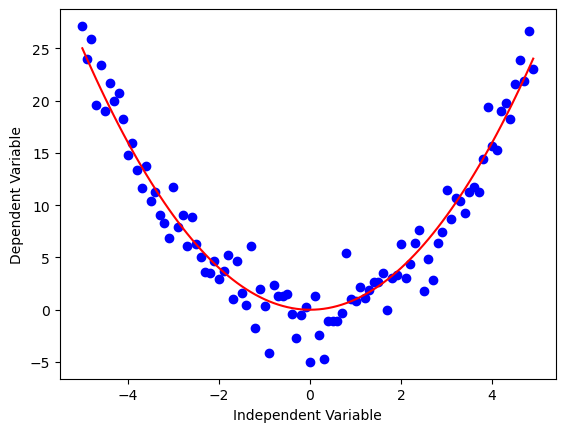

In [53]:
# As you can see, this function has  𝑥3  and  𝑥2  as independent variables. Also, the graphic of this 
# function is not a straight line over the 2D plane. So this is a non-linear function.
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

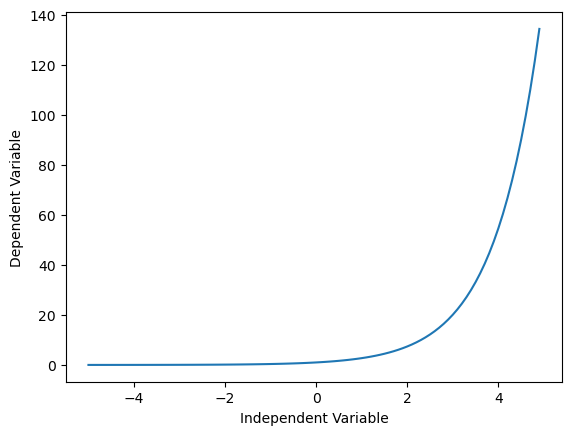

In [54]:
# Exponential¶

# An exponential function with base c is defined by
# 𝑌=𝑎+𝑏𝑐𝑋
 
# where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable.

X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

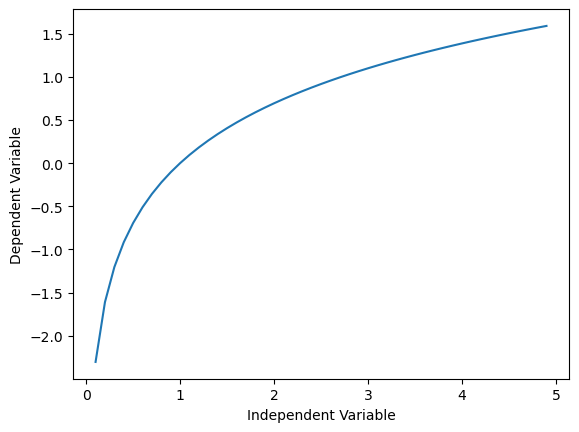

In [59]:
# Logarithmic
# The response  𝑦  is a results of applying the logarithmic map from the input  𝑥  to the output  𝑦 . 
# It is one of the simplest form of log(): i.e.
# 𝑦=log(𝑥)
 
# Please consider that instead of  𝑥 , we can use  𝑋 , which can be a polynomial representation of the  𝑥  values.
# In general form it would be written as
# 𝑦=log(𝑋)
X = np.arange(0.1, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

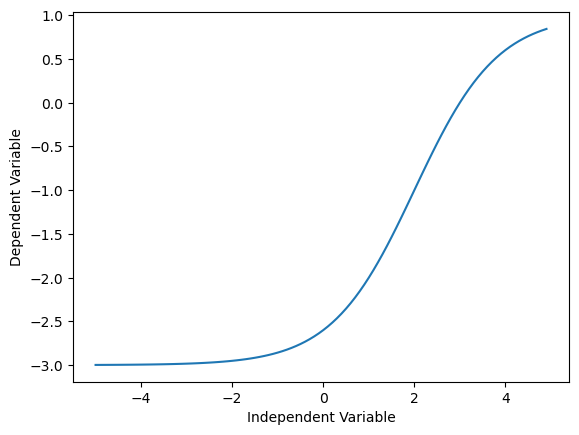

In [63]:
# Sigmoidal/Logistic¶
X = np.arange(-5.0, 5.0, 0.1)
# print(X)

Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [64]:
# Non-Linear Regression example¶
# For an example, we're going to try and fit a non-linear model to the datapoints corresponding to China's 
# GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the 
# second, China's corresponding annual gross domestic income in US dollars for that year.
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2022-12-22 17:45:57 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


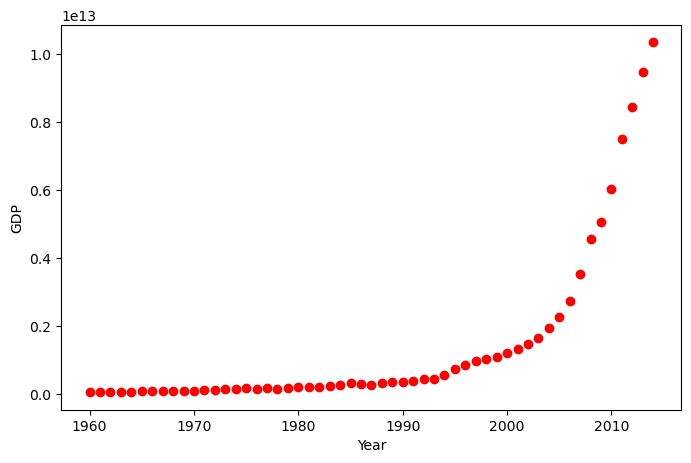

In [65]:
# Plotting the Dataset¶
# This is what the datapoints look like. It kind of looks like an either logistic or exponential function. 
# The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerates 
# slightly in the 2010s.
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

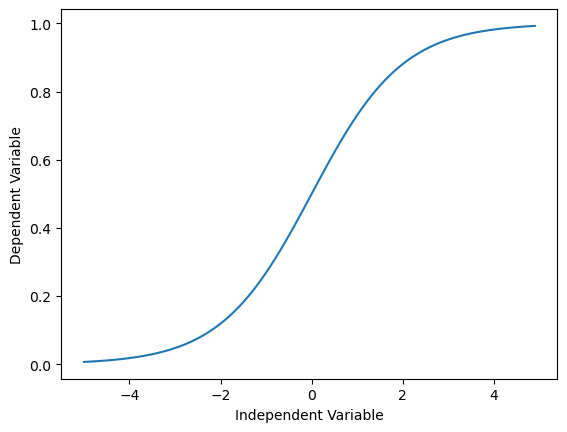

In [66]:
# Choosing a model
# From an initial look at the plot, we determine that the logistic function could be a good approximation, 
# since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing
# again at the end; as illustrated below:

X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [67]:

# Building The Model 
# Now, let's build our regression model and initialize its parameters.
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

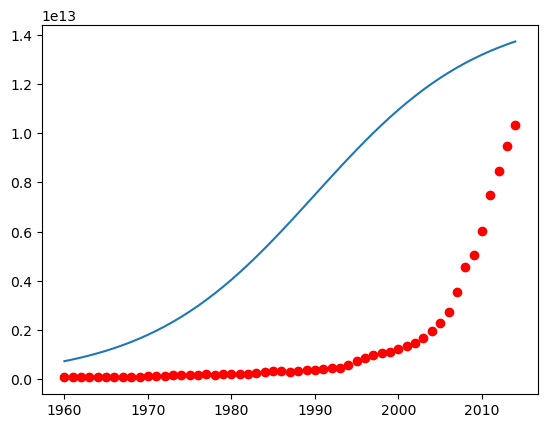

In [68]:
# Lets look at a sample sigmoid line that might fit with the data:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [70]:
# Our task here is to find the best parameters for our model. Lets first normalize our x and y:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [71]:
# How we find the best parameters for our fit line?
# we can use curve_fit which uses non-linear least squares to fit our sigmoid function, to data. 
# Optimize values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is 
# minimized.

# popt are our optimized parameters.

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451709, beta_2 = 0.997207


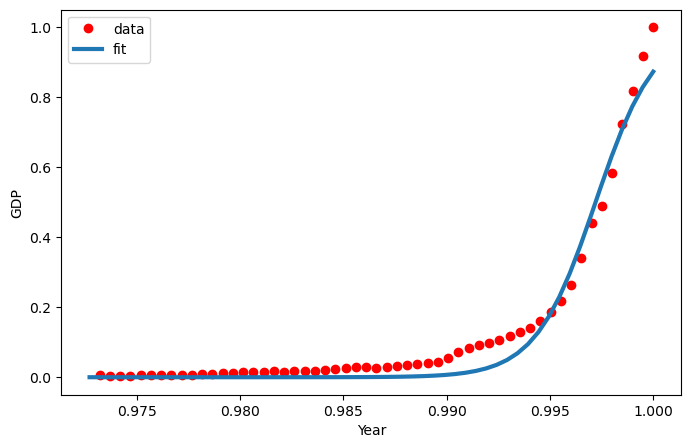

In [72]:
# Now we plot our resulting regression model.
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [73]:
# Practice¶
# Can you calculate what is the accuracy of our model?
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.97


In [ ]:
# we shall begin with another machine learning algorithm